# SMS SPAM DETECTION

Dataset = [SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)

Tutorial = [CampusX](https://www.youtube.com/watch?v=YncZ0WwxyzU&t=277s)

## Importing modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/spam.csv')

In [3]:
df.head(5)

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
df.sample(5)

v1                                                 v2 Unnamed: 2  \
3258  spam  Congratulations! Thanks to a good friend U hav...        NaN   
1057   ham                               Ard 515 like dat. Y?        NaN   
1973   ham  I had askd u a question some hours before. Its...        NaN   
2896   ham  �� collecting ur laptop then going to configur...        NaN   
5506   ham  God's love has no limit. God's grace has no me...        NaN   

     Unnamed: 3 Unnamed: 4  
3258        NaN        NaN  
1057        NaN        NaN  
1973        NaN        NaN  
2896        NaN        NaN  
5506        NaN        NaN

In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dropping last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [9]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [10]:
# Renaming the column to make it understandable
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

target                                               text
4957    ham                   Why didn't u call on your lunch?
3504    ham             life alle mone,eppolum oru pole allalo
32      ham                      K tell me anything about you.
2752    ham                         Sat right? Okay thanks... 
4246   spam  Text PASS to 69669 to collect your polyphonic ...

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [14]:
# Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# Checking the duplicate values
df.duplicated().sum()

403

In [16]:
# Remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
# Checking the duplicate values again
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA

In [19]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [21]:
import matplotlib.pyplot as plt

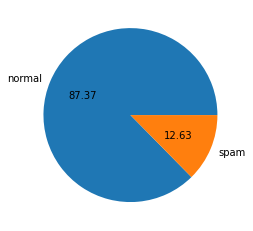

In [22]:
plt.pie(df['target'].value_counts(), labels=['normal', 'spam'], autopct="%0.2f")
plt.show()

The data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# num of character
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [29]:
# num of sentences (separated by dot (.))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [31]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.923776    18.456375       1.962275
std         58.174846    13.323322       1.433892
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [32]:
# normal sms
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.456820    17.123339       1.815545
std         56.356802    13.491315       1.364098
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [33]:
# spam sms
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.479326   27.675345       2.977029
std         30.014336    7.011513       1.493676
min         13.000000    2.000000       1.000000
25%        131.000000   25.000000       2.000000
50%        148.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        223.000000   46.000000       9.000000

In [34]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

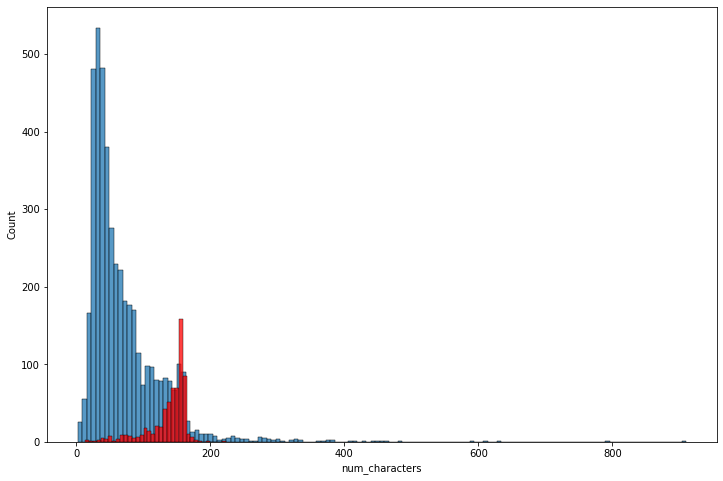

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

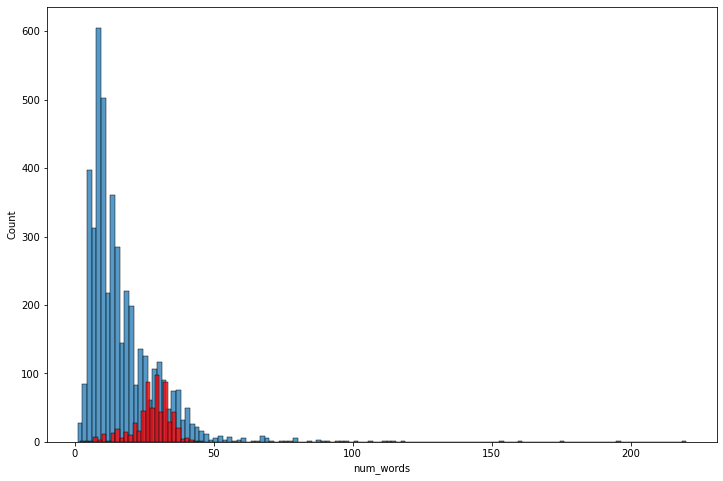

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

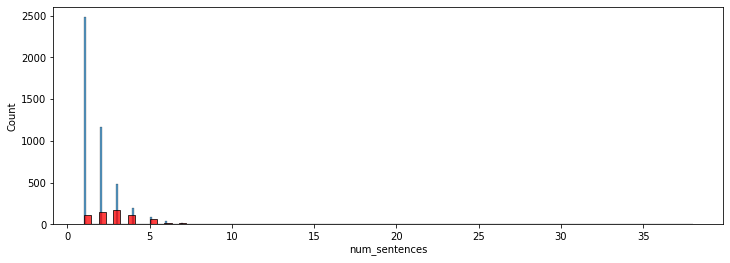

In [37]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

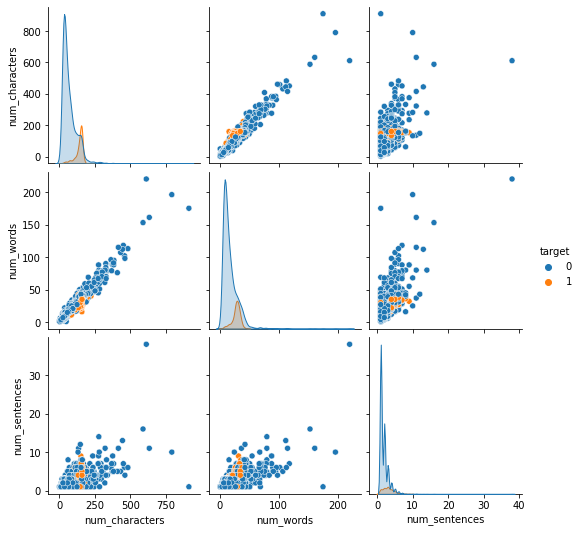

In [38]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

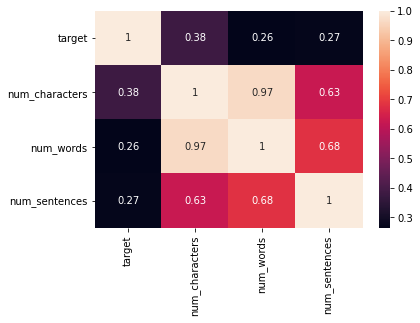

In [39]:
sns.heatmap(df.corr(), annot=True)

## 3. Data Processing

* Lower case

* Tokenization

* Removing special characters

* Removing stop words and punctuation

* Stemming

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [42]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [43]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [46]:
from wordcloud import WordCloud
wcloud = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [47]:
spam_wcloud = wcloud.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

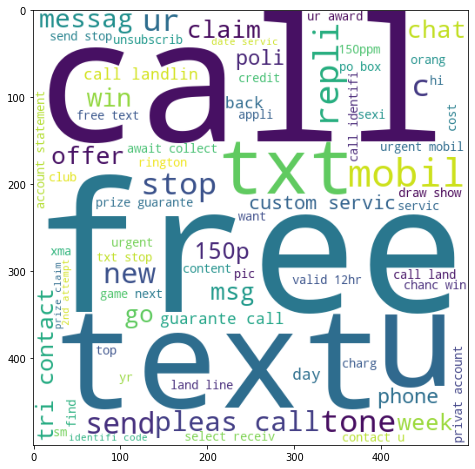

In [48]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wcloud)

In [49]:
normal_wcloud = wcloud.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

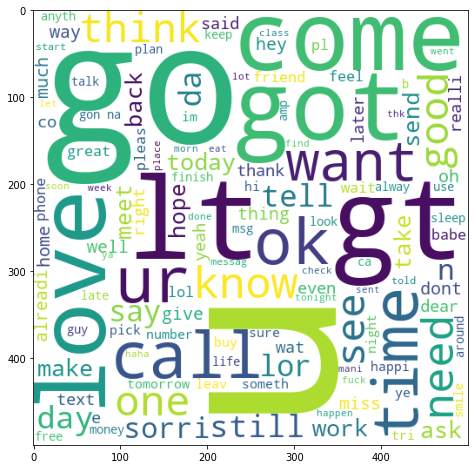

In [50]:
plt.figure(figsize=(12, 8))
plt.imshow(normal_wcloud)

### SPAM SMS

In [51]:
spam_corpus = []
for sms in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sms.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9941

In [53]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [54]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

0    1
0      call  320
1      free  191
2         2  155
3       txt  141
4      text  122
5         u  119
6        ur  119
7     mobil  114
8      stop  104
9     repli  103
10    claim   98
11        4   97
12    prize   82
13      get   74
14      new   64
15   servic   64
16     tone   63
17     send   60
18   urgent   57
19    nokia   57
20  contact   56
21    award   55
22    phone   52
23     cash   51
24    pleas   51
25     week   49
26      win   48
27        c   45
28  collect   45
29      min   45

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


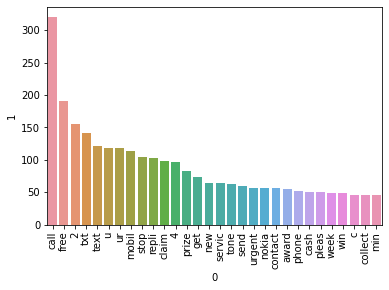

In [55]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### NORMAL SMS

In [56]:
normal_corpus = []
for sms in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sms.split():
        normal_corpus.append(word)

In [57]:
len(normal_corpus)

35303

In [58]:
Counter(normal_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('ok', 215),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [59]:
pd.DataFrame(Counter(normal_corpus).most_common(10))

0    1
0     u  883
1    go  404
2   get  349
3    gt  288
4    lt  287
5     2  284
6  come  275
7   got  236
8  know  236
9  like  234

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


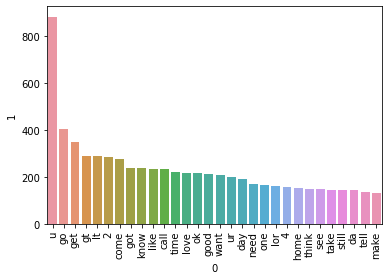

In [60]:
sns.barplot(pd.DataFrame(Counter(normal_corpus).most_common(30))[0], pd.DataFrame(Counter(normal_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Build

In [112]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [113]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [114]:
X.shape

(5169, 3000)

In [115]:
y = df['target'].values

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_pred_gnb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Precision score:\n", precision_score(y_test, y_pred_gnb))

Accuracy score:
 0.8704061895551257
Confusion matrix:
 [[788 108]
 [ 26 112]]
Precision score:
 0.509090909090909


In [71]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_pred_mnb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Precision score:\n", precision_score(y_test, y_pred_mnb))

Accuracy score:
 0.971953578336557
Confusion matrix:
 [[896   0]
 [ 29 109]]
Precision score:
 1.0


In [72]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_pred_bnb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("Precision score:\n", precision_score(y_test, y_pred_bnb))

Accuracy score:
 0.9835589941972921
Confusion matrix:
 [[895   1]
 [ 16 122]]
Precision score:
 0.991869918699187


We will use tfidf with MNB

### Another Common ML Algorithm

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KNN' : knn, 
    'NB' : mnb, 
    'DT' : dtc, 
    'LR' : lrc, 
    'RF' : rfc, 
    'AdaBoost' : abc, 
    'BgC' : bc, 
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [76]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy,precision

In [77]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9748549323017408, 0.9745762711864406)

In [78]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(f"[{name}]")
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

[SVC]
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
[KNN]
Accuracy:  0.9052224371373307
Precision:  1.0
[NB]
Accuracy:  0.971953578336557
Precision:  1.0
[DT]
Accuracy:  0.9313346228239845
Precision:  0.8252427184466019
[LR]
Accuracy:  0.9564796905222437
Precision:  0.9696969696969697
[RF]
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829
[AdaBoost]
Accuracy:  0.9613152804642167
Precision:  0.9454545454545454
[BgC]
Accuracy:  0.9593810444874274
Precision:  0.8692307692307693
[ETC]
Accuracy:  0.9796905222437138
Precision:  0.975609756097561
[GBDT]
Accuracy:  0.9468085106382979
Precision:  0.9278350515463918
C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as 

In [90]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values(['Precision', 'Accuracy'], ascending=False)

In [91]:
performance_df

Algorithm  Accuracy  Precision
2         NB  0.971954   1.000000
1        KNN  0.905222   1.000000
5         RF  0.975822   0.982906
8        ETC  0.979691   0.975610
0        SVC  0.974855   0.974576
4         LR  0.956480   0.969697
6   AdaBoost  0.961315   0.945455
10       xgb  0.968085   0.933884
9       GBDT  0.946809   0.927835
7        BgC  0.959381   0.869231
3         DT  0.931335   0.825243

In [92]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [93]:
performance_df1

Algorithm   variable     value
0         NB   Accuracy  0.971954
1        KNN   Accuracy  0.905222
2         RF   Accuracy  0.975822
3        ETC   Accuracy  0.979691
4        SVC   Accuracy  0.974855
5         LR   Accuracy  0.956480
6   AdaBoost   Accuracy  0.961315
7        xgb   Accuracy  0.968085
8       GBDT   Accuracy  0.946809
9        BgC   Accuracy  0.959381
10        DT   Accuracy  0.931335
11        NB  Precision  1.000000
12       KNN  Precision  1.000000
13        RF  Precision  0.982906
14       ETC  Precision  0.975610
15       SVC  Precision  0.974576
16        LR  Precision  0.969697
17  AdaBoost  Precision  0.945455
18       xgb  Precision  0.933884
19      GBDT  Precision  0.927835
20       BgC  Precision  0.869231
21        DT  Precision  0.825243

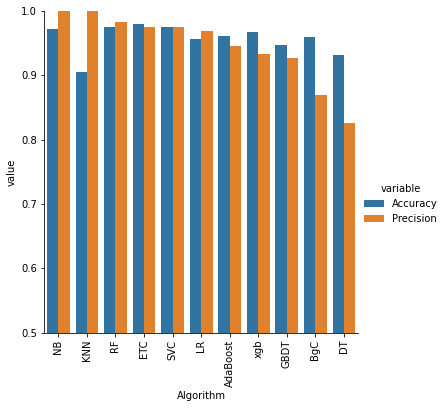

In [98]:
sns.catplot(x='Algorithm', y='value', hue='variable',
            data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

## 5. Evaluation

### Voting classifier

In [100]:
from sklearn.ensemble import VotingClassifier

In [101]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [102]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [103]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [108]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


### Applying Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [109]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [110]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9777562862669246
Precision 0.9323308270676691


In [118]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_pred_mnb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Precision score:\n", precision_score(y_test, y_pred_mnb))

Accuracy score:
 0.971953578336557
Confusion matrix:
 [[896   0]
 [ 29 109]]
Precision score:
 1.0


## 6. Saving the Model

In [120]:
import pickle
pickle.dump(tfidf, open('./deploy/model/spam_vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('./deploy/model/spam_model.pkl', 'wb'))

The deployment will be saved in deploy directory